In [797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import recall_score

In [798]:
df=pd.read_csv('/content/drive/MyDrive/Ingeniería de Sistemas/2023-1/BigData/diabetes.csv',sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [800]:
"""
df['Glucose']=df['Glucose'].astype('category')
df['Insulin']=df['Insulin'].astype('category')
df['Age']=df['Age'].astype('category')
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].astype('category')
df['BloodPressure']=df['BloodPressure'].astype('category')
df['Outcome']=df['Outcome'].astype('category')
"""

"\ndf['Glucose']=df['Glucose'].astype('category')\ndf['Insulin']=df['Insulin'].astype('category')\ndf['Age']=df['Age'].astype('category')\ndf['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].astype('category')\ndf['BloodPressure']=df['BloodPressure'].astype('category')\ndf['Outcome']=df['Outcome'].astype('category')\n"

In [801]:
 df = df.drop(['Pregnancies','SkinThickness','Age'], axis=1) #DESCARTE DE VARIABLES NO UTILIZADAS

In [802]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,0,33.6,0.627,1
1,85,66,0,26.6,0.351,0
2,183,64,0,23.3,0.672,1
3,89,66,94,28.1,0.167,0
4,137,40,168,43.1,2.288,1


In [803]:
#dummies
#df =pd.get_dummies(df,columns=['Glucose','BloodPressure','Insulin','DiabetesPedigreeFunction', 'BMI'])
#df

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

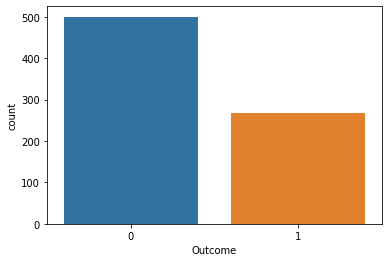

In [804]:
sns.countplot(df['Outcome'])

In [805]:
X = df.loc[:, df.columns != 'Outcome']
X #Todas diferentes a la salida, definicion del X

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,0,33.6,0.627
1,85,66,0,26.6,0.351
2,183,64,0,23.3,0.672
3,89,66,94,28.1,0.167
4,137,40,168,43.1,2.288
...,...,...,...,...,...
763,101,76,180,32.9,0.171
764,122,70,0,36.8,0.340
765,121,72,112,26.2,0.245
766,126,60,0,30.1,0.349


In [806]:
Outcome = df.Outcome

In [807]:
from sklearn.tree import DecisionTreeClassifier  #Para el TreeDecision

In [808]:
modelo = DecisionTreeClassifier(max_depth=4,random_state=60)

In [809]:
#Tomamos el valor del 20% para test(pdf)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Outcome,test_size=0.20,random_state=0)

In [810]:
modelo.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=4, random_state=60)

In [811]:
y_pred = modelo.predict(X_test)

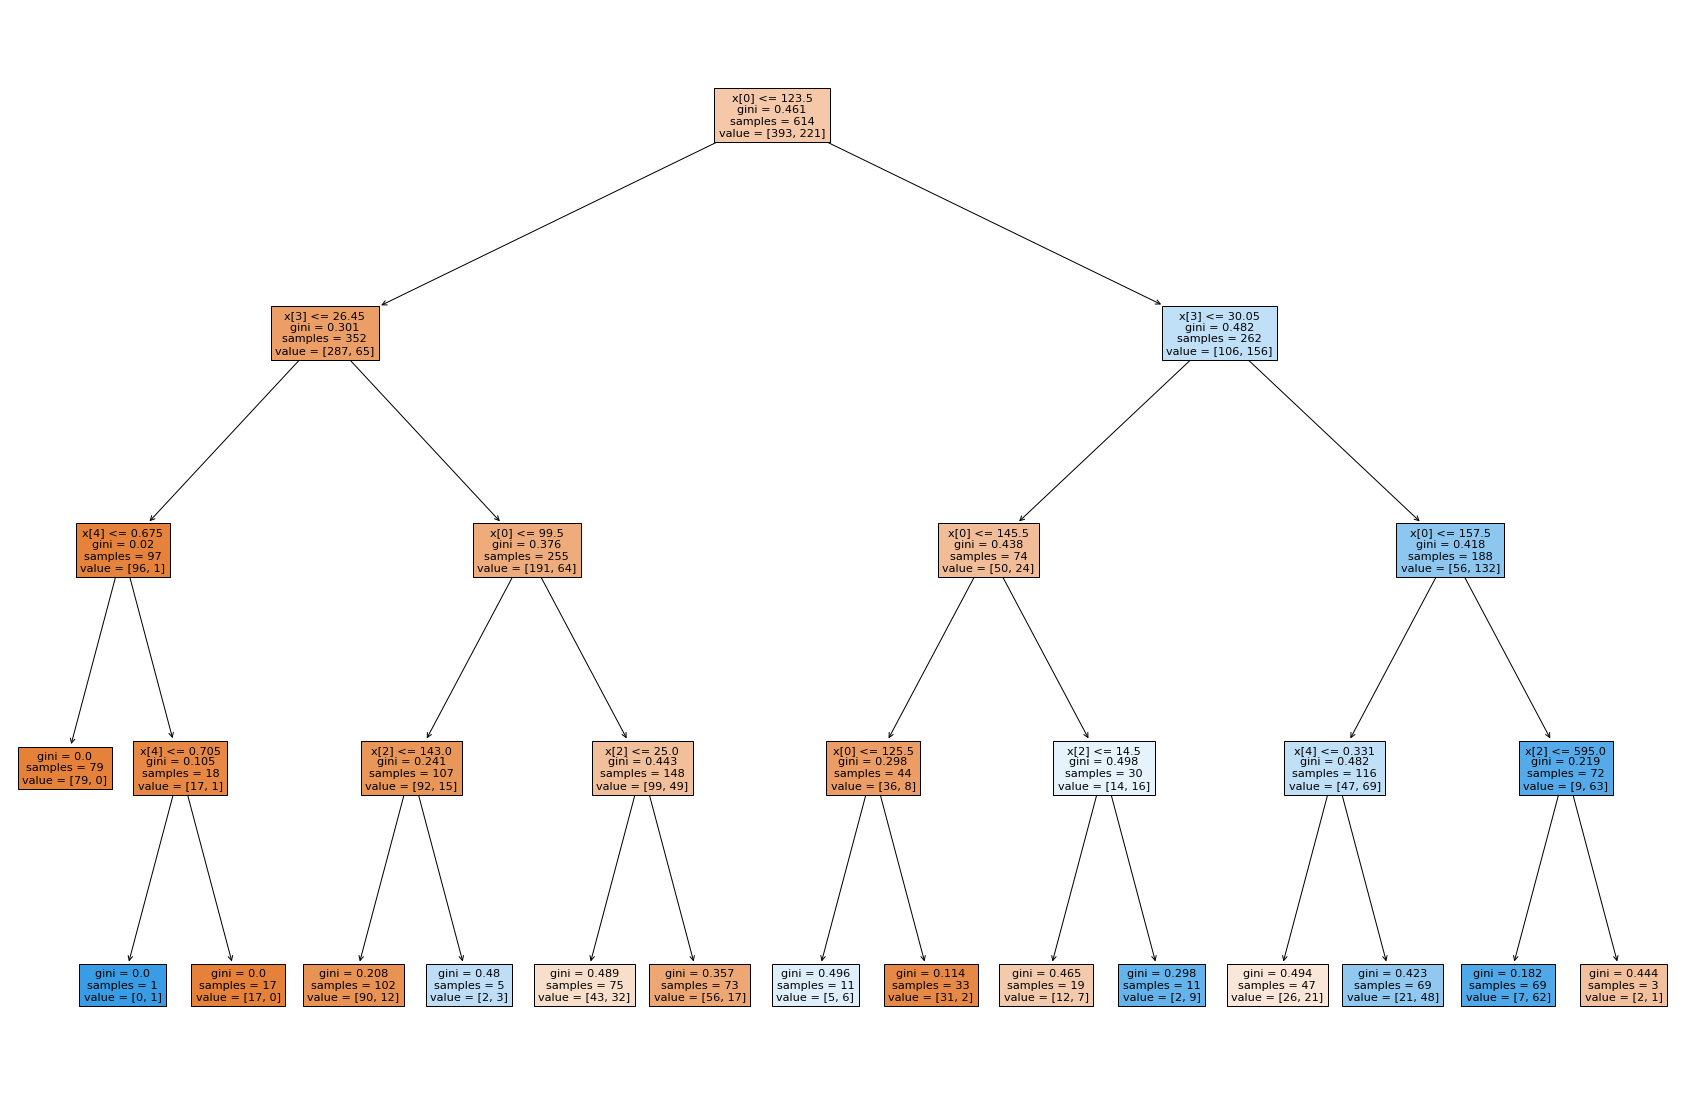

In [812]:
plt.figure(figsize=(30,20))
tree.plot_tree(modelo, filled=True)
plt.show()

**Matriz de confusión**

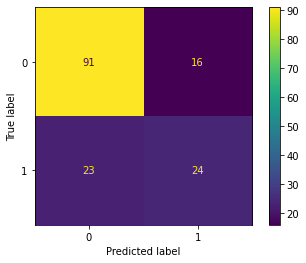

In [813]:
#Confussion
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [814]:
EXACTITUD = accuracy_score(y_test, y_pred)
print("Exactitud", EXACTITUD)
PRECISION = precision_score(y_test, y_pred)
print("Precision", PRECISION)
SENSIBILIDAD = recall_score(y_test,y_pred)
print("Sensibilidad", SENSIBILIDAD)

Exactitud 0.7467532467532467
Precision 0.6
Sensibilidad 0.5106382978723404


A PARTIR DE ACA SEGUNDO ARBOL CON 6 DE PROFUNDIDAD

---



In [815]:
modelo1 = DecisionTreeClassifier(max_depth=6,random_state=52)

In [816]:
modelo1.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=6, random_state=52)

In [817]:
y_pred1 = modelo1.predict(X_test)

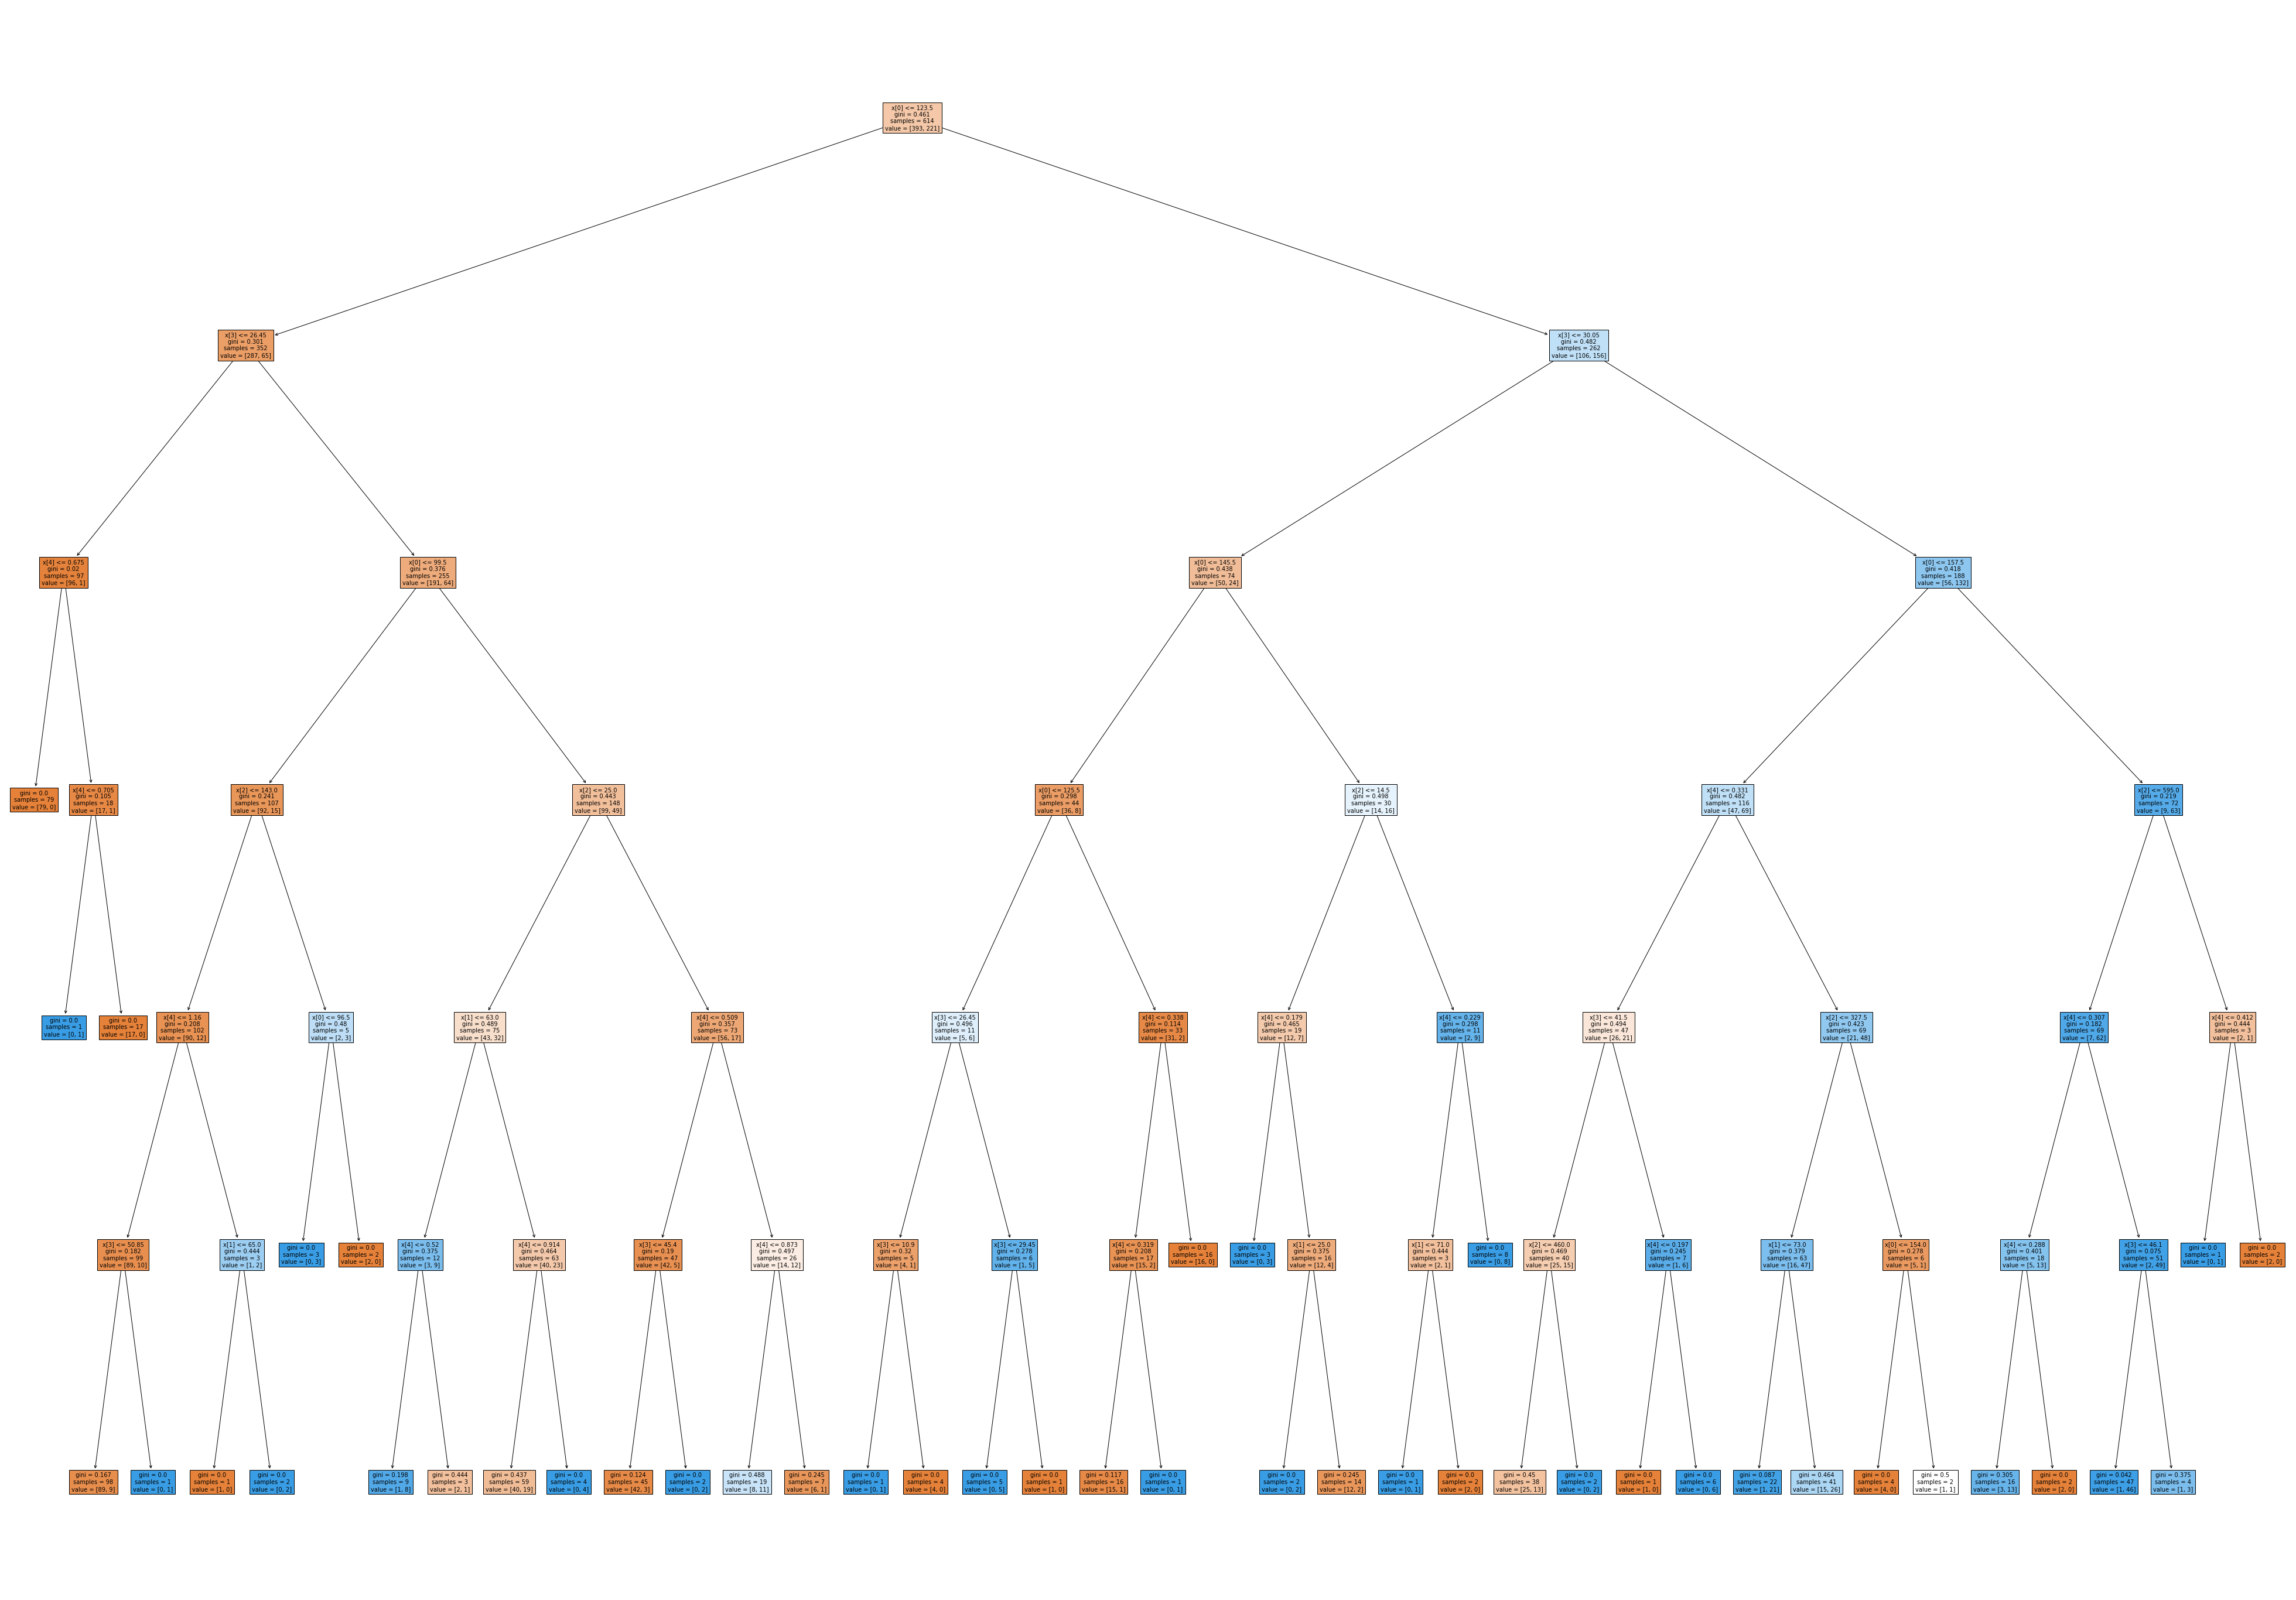

In [818]:
plt.figure(figsize=(70,50))
tree.plot_tree(modelo1, filled=True)
plt.show()

In [819]:
print(accuracy_score(y_test,y_pred1))

0.7077922077922078


## Se crea la matriz de confusión para el arbol con profundidad de 4, accuracy = 74%, mientras que el de 6 de profundidad es accuracy = 70%.

## Tambien se hace una anotación en el tema de la "Age" ya que altera significativamente los resultados en ambos árboles y se toma la decisión de eliminarla y cambiarla por "BMI" por temas de precisión y selección de los datos más precisos posibles.

## Un TreeDecision puede llegar tan profundo como se quiera, pero, corre el riesgo de no generar predicciones correctas, debido a que comienza a aprender el patron y con un dato X diferente o alterado no será del todo preciso.